# General Approach to Bayesian Optimization (GPyOpt)

Bayesian Optimization is a way to try and find a maximum or minimum (global or local) of an unknown function. In our lab, these functions are models that are time intensive and expensive to evaluate, so we want to do this optimization in as few evaluations as possible. 

Right now, to illustrate a basic bayesian optimization routine, we will try and minimize a much simpler function that we understand very well. The function is

$$f(x) = (x-3)*(x-2)*(x-1)*x*(x+2)*(x+3)$$

which has a global min at -2.6 and two other local minima.

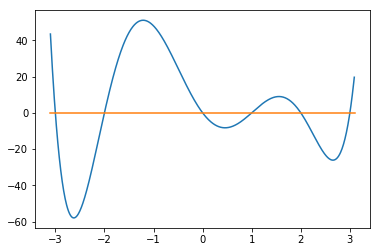

In [1]:
import matplotlib.pyplot as plt
import numpy as np
f = lambda x: (x-3)*(x-2)*(x-1)*x*(x+2)*(x+3)
plt.plot((np.array(range(620))-310)/100.,list(map(f, (np.array(range(620))-310)/100.)))
plt.plot((-3.1,3.1),(0,0))
plt.show()

To do the actual optimization, we will first use an open source package called [GPyOpt](http://sheffieldml.github.io/GPyOpt/z) from the University of Sheffield. This is based on another package produced by the same group called [GPy](https://sheffieldml.github.io/GPy/) which is used for general gaussian processes. Below, we import the BayesianOptimization method from the GPyOpt package, and define our function.

We then evaluate `foo` at three different points to have some history that we can pass into our optimization routine. Inputs into the Bayestian Optimization function must be in 2D numpy arrays:

In [2]:
from GPyOpt.methods import BayesianOptimization
import numpy as np

def foo(x):
    return (x-3)*(x-2)*(x-1)*x*(x+2)*(x+3)

x_init = np.array([[2],[0.5],[-2.9]]) 
y_init = foo(x_init)

ImportError: No module named GPyOpt.methods

Now we can pass our initial $x$ and $y$ values into the BayesianOptimization routine, along with the limits we will set for possible $x$ values.

In [ ]:
myBopt = BayesianOptimization(f=None, 
                              X = x_init, 
                              Y = y_init, 
                              domain=[{'name':'x','type': 'continuous','domain': (-3.3,3.3)}])
print "The next suggested sample is: " + str(float(myBopt.suggested_sample[[0]]))

This is found by using the acquisition function, which balances spatial exploration with potential for improvement. Below, we can plot the acquisition function given our 3 function evaluations:

In [ ]:
myBopt.plot_acquisition()

In the plot above, we can get insight about the distribution imposed over all functions in $\mathbb{R}^2$ by the Gaussian Process. There are two plots here, the first of the distribution given by the Gaussian Process (the black line surrounded by the blue confidence intervals) and the acquisition function (the red line at the bottom). Our suggested sample is given by the maximum of the acquisition function.

(If we had initialized our Gaussian Process on 3 different points, we can observe the new distribution and acquisition function below:)

In [ ]:
x_init1 = np.array([[-1.5],[0.7],[1.8]])
y_init1 = foo(x_init1)
myBopt1 = BayesianOptimization(f=None, X = x_init1, Y = y_init1, bounds=[(-3.3,3.3)])
myBopt1.plot_acquisition()

As we generate more function evaluations, we have a better and better understanding of the underlying function and the distribution of functions gets more concentrated around the "mean" function (the black line in the above plots). Let's generate a few more samples and observe what happens to our acquisition function.

In [ ]:
myBopt.plot_acquisition()
print "The last suggested sample was: " + str(float(myBopt.suggested_sample[[0]]))

#Stack the suggested sample onto our function history
x_init = np.vstack([x_init,myBopt.suggested_sample])
y_init = np.vstack([y_init,foo(myBopt.suggested_sample)])

#Generate the next new sample
myBopt = BayesianOptimization(f=None, X = x_init, Y = y_init, bounds=[(-3.3,3.3)])
myBopt.plot_acquisition()
print "The next suggested sample is: " + str(float(myBopt.suggested_sample[[0]]))